In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [16]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [17]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.694044,0.875461,1.550633,-0.051156,-0.426228,0
1,-1.250265,-1.169197,0.757133,1.623059,1.859502,1
2,-0.444275,4.098917,-0.899852,0.784576,-0.203545,0
3,0.419860,0.125073,1.682327,1.593256,0.151828,1
4,-2.780861,0.289050,3.602035,-0.778772,2.239397,1


In [18]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [19]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [20]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [21]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')


In [25]:
df3

,col3,col1,target
14,0.019278,-0.492361,0
69,1.520255,-0.521999,0
16,0.712452,-0.157121,1
75,1.662420,0.061769,1
37,1.222852,0.027433,1
63,0.643484,-2.966974,0
15,0.358878,0.267776,0
41,1.285917,-1.779680,0
24,2.151304,-1.469452,1
70,2.275045,0.374755,0


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [31]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[2] <= 0.5\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]')]

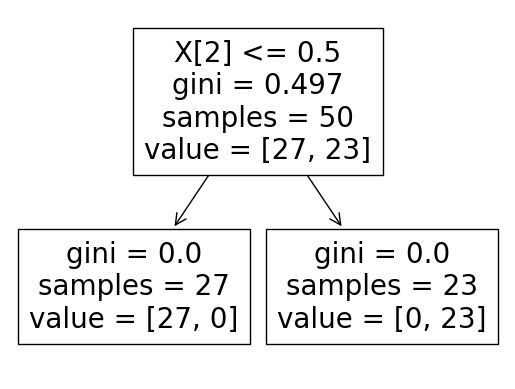

In [32]:
plot_tree(clf1)

[Text(0.5, 0.75, 'X[2] <= 0.5\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]')]

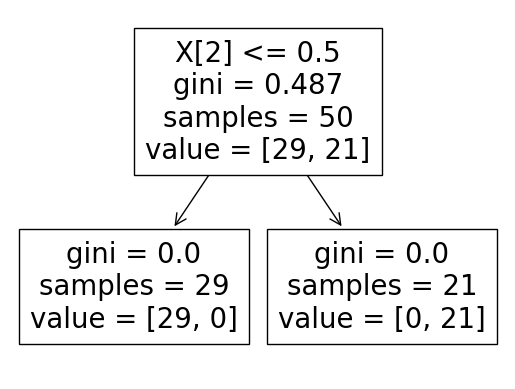

In [33]:
plot_tree(clf2)

[Text(0.5, 0.75, 'X[2] <= 0.5\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

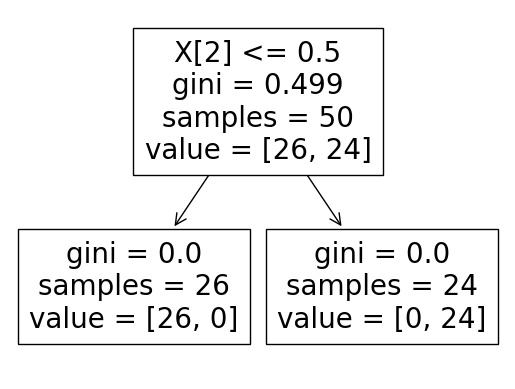

In [34]:
plot_tree(clf3)

In [35]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 3 features as input.

In [36]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 3 features as input.

In [145]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
